### Importação dos dados



In [140]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

#colocando tudo em um frame so

dados = pd.concat([loja, loja2, loja3, loja4])

dados.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [141]:

# Função para encontrar o melhor vendedor
def quemVenderMais(vendedores):
    # Verificar se as colunas necessárias existem
    if 'Vendedor' not in vendedores.columns or 'Preço' not in vendedores.columns:
        print("Erro: As colunas 'Vendedor' e 'Preço' não estão presentes nos dados.")
        return None

    # Agrupar e somar as vendas por vendedor
    total_vendas = vendedores.groupby('Vendedor')['Preço'].sum()

    # Identificar o vendedor com maior faturamento
    melhor_vendedor = total_vendas.idxmax()
    maior_valor = total_vendas.max()

    print(f"O melhor vendedor foi {melhor_vendedor} com um total de R${maior_valor:.2f}.")
    return melhor_vendedor, maior_valor

# Chamando a função
quemVenderMais(dados)


O melhor vendedor foi Felipe Santos com um total de R$471727.50.


('Felipe Santos', np.float64(471727.5))

In [142]:
def compararVendas(vendedores):
    # Verificar se as colunas necessárias existem
    if 'Vendedor' not in vendedores.columns or 'Preço' not in vendedores.columns:
        print("Erro: As colunas 'Vendedor' e 'Preço' não estão presentes nos dados.")
        return None

    # Agrupar e somar as vendas por vendedor
    total_vendas = vendedores.groupby('Vendedor')['Preço'].sum()

    # Identificar o melhor vendedor
    melhor_vendedor = total_vendas.idxmax()
    maior_valor = total_vendas.max()

    # Comparação com outros vendedores
    print(f"\n📊 **Resumo das Vendas** 📊")
    print("---------------------------------")
    print(f"🏆 Melhor Vendedor: {melhor_vendedor}")
    print(f"💰 Total de Faturamento: R${maior_valor:,.2f}")
    print("---------------------------------")
    print("💡 Comparação com outros vendedores:")

    for vendedor, valor in total_vendas.items():
        if vendedor != melhor_vendedor:
            diferenca_percentual = ((maior_valor - valor) / maior_valor) * 100
            print(f"- {vendedor}: R${valor:,.2f} (Diferença: -{diferenca_percentual:.2f}%)")
        else:
            print(f"- {vendedor}: R${valor:,.2f} (Líder de vendas)")

    return total_vendas

# Chamando a função
compararVendas(dados)


📊 **Resumo das Vendas** 📊
---------------------------------
🏆 Melhor Vendedor: Felipe Santos
💰 Total de Faturamento: R$471,727.50
---------------------------------
💡 Comparação com outros vendedores:
- Beatriz Moraes: R$403,594.08 (Diferença: -14.44%)
- Bianca Santos: R$399,447.52 (Diferença: -15.32%)
- Bruno Rodrigues: R$388,833.65 (Diferença: -17.57%)
- Camila Ribeiro: R$404,245.51 (Diferença: -14.31%)
- Felipe Santos: R$471,727.50 (Líder de vendas)
- Isabella Pereira: R$391,225.41 (Diferença: -17.07%)
- João Souza: R$411,416.10 (Diferença: -12.79%)
- Juliana Costa: R$451,153.64 (Diferença: -4.36%)
- Larissa Alves: R$466,258.85 (Diferença: -1.16%)
- Lucas Oliveira: R$407,203.55 (Diferença: -13.68%)
- Mariana Ferreira: R$377,735.58 (Diferença: -19.93%)
- Pedro Gomes: R$417,803.49 (Diferença: -11.43%)
- Rafael Costa: R$413,723.01 (Diferença: -12.30%)
- Thiago Silva: R$467,122.90 (Diferença: -0.98%)


Vendedor
Beatriz Moraes      403594.08
Bianca Santos       399447.52
Bruno Rodrigues     388833.65
Camila Ribeiro      404245.51
Felipe Santos       471727.50
Isabella Pereira    391225.41
João Souza          411416.10
Juliana Costa       451153.64
Larissa Alves       466258.85
Lucas Oliveira      407203.55
Mariana Ferreira    377735.58
Pedro Gomes         417803.49
Rafael Costa        413723.01
Thiago Silva        467122.90
Name: Preço, dtype: float64

#1. Análise do faturamento


In [143]:


# Verificar e encontrar o maior preço
if 'Produto' in dados.columns and 'Preço' in dados.columns:
    maior_preco = dados['Preço'].max()
    unidade_maior_preco = dados[dados['Preço'] == maior_preco]['Produto'].values[0]

    print(f"\n💰 O maior preço encontrado foi R${maior_preco:,.2f}, na unidade '{unidade_maior_preco}'.")
else:
    print("Erro: As colunas 'Loja' ou 'Preço' não estão presentes nos dados.")


💰 O maior preço encontrado foi R$3,969.38, na unidade 'TV Led UHD 4K'.


In [144]:
#VERIFICANDO O FATURAMENTO DE CADA LOJA
import pandas as pd

# URLs dos arquivos CSV
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Carregar os dados de cada loja
loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Função para calcular o faturamento de cada loja
def faturamento(loja, nome_loja):
        #(isinstance verificar se o objeto pertence a uma classe ou tupla)
    if isinstance(loja, pd.DataFrame) and 'Preço' in loja.columns:
        valor_faturamento = loja['Preço'].sum()
        print(f"Faturamento: {nome_loja} - R$ {valor_faturamento:.2f}")
        return valor_faturamento
    else:
        print(f"Erro: A estrutura de dados fornecida para '{nome_loja}' não é um DataFrame válido ou não contém a coluna 'Preço'.")
        return None

# Imprimindo o faturamento de cada loja
faturamento_loja1 = faturamento(loja1, 'Unidade 1')
faturamento_loja2 = faturamento(loja2, 'Unidade 2')
faturamento_loja3 = faturamento(loja3, 'Unidade 3')
faturamento_loja4 = faturamento(loja4, 'Unidade 4')



Faturamento: Unidade 1 - R$ 1534509.12
Faturamento: Unidade 2 - R$ 1488459.06
Faturamento: Unidade 3 - R$ 1464025.03
Faturamento: Unidade 4 - R$ 1384497.58


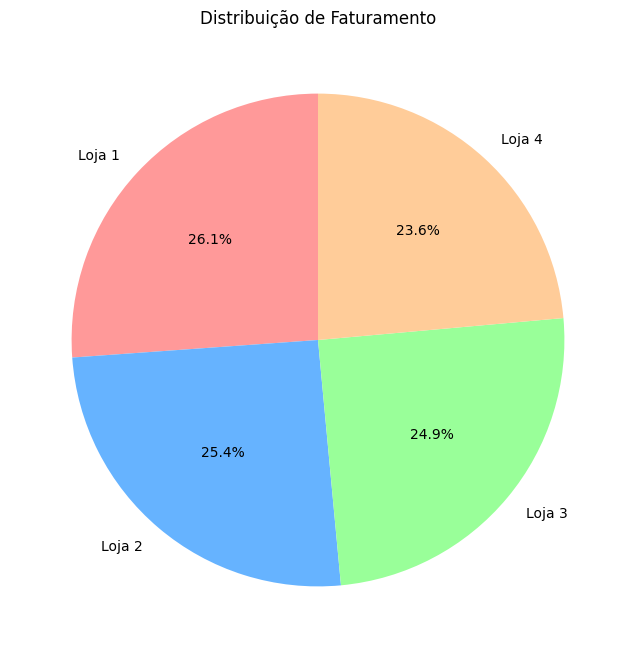

In [145]:

#Importanto a biblioteca e carregando os dados
import matplotlib.pyplot as plt

def gerar_grafico(dados):

    nomes_lojas = []
    valores_faturamento = []

    for loja, nome_loja in dados:
        nomes_lojas.append(nome_loja)
        valores_faturamento.append(loja['Preço'].sum())


# Dados para o gráfico de pizza
labels = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
valores = [faturamento_loja1,faturamento_loja2, faturamento_loja3, faturamento_loja4]
cores = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Criando o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(valores, labels=labels, colors=cores, autopct='%1.1f%%', startangle=90)

# Adicionando título
plt.title('Distribuição de Faturamento')

# Exibindo o gráfico
plt.show()


# 2. Vendas por Categoria


In [146]:
import pandas as pd

def faturamento_por_categoria(lojas, nomes_lojas, exibir_resultado=True):

    resultados = {}

    for loja, nome_loja in zip(lojas, nomes_lojas):
        # Agrupando por categoria
        quantidade_categoria = loja.groupby('Categoria do Produto').size().reset_index(name='Quantidade de Vendas')
        # Ordenando pelo número de vendas
        quantidade_categoria = quantidade_categoria.sort_values(by='Quantidade de Vendas', ascending=False)

        # Exibição opcional do resultado
        if exibir_resultado:
            print(f'\nCategorias mais populares - {nome_loja}:')
            print(quantidade_categoria)

        # Salvando no dicionário
        resultados[nome_loja] = quantidade_categoria

    return resultados

lojas = [loja, loja2, loja3, loja4]  # Lista de DataFrames das lojas
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']  # Lista dos nomes das lojas

faturamentos = faturamento_por_categoria(lojas, nomes_lojas)


Categorias mais populares - Loja 1:
    Categoria do Produto  Quantidade de Vendas
6                 moveis                   465
2            eletronicos                   448
0             brinquedos                   324
1       eletrodomesticos                   312
3        esporte e lazer                   284
4  instrumentos musicais                   182
5                 livros                   173
7  utilidades domesticas                   171

Categorias mais populares - Loja 2:
    Categoria do Produto  Quantidade de Vendas
6                 moveis                   442
2            eletronicos                   422
0             brinquedos                   313
1       eletrodomesticos                   305
3        esporte e lazer                   275
4  instrumentos musicais                   224
5                 livros                   197
7  utilidades domesticas                   181

Categorias mais populares - Loja 3:
    Categoria do Produto  Quantidade de Ven

# 3. Média de Avaliação das Lojas

Média da Loja 1: 3.98
Média da Loja 2: 4.04
Média da Loja 3: 4.05
Média da Loja 4: 4.00


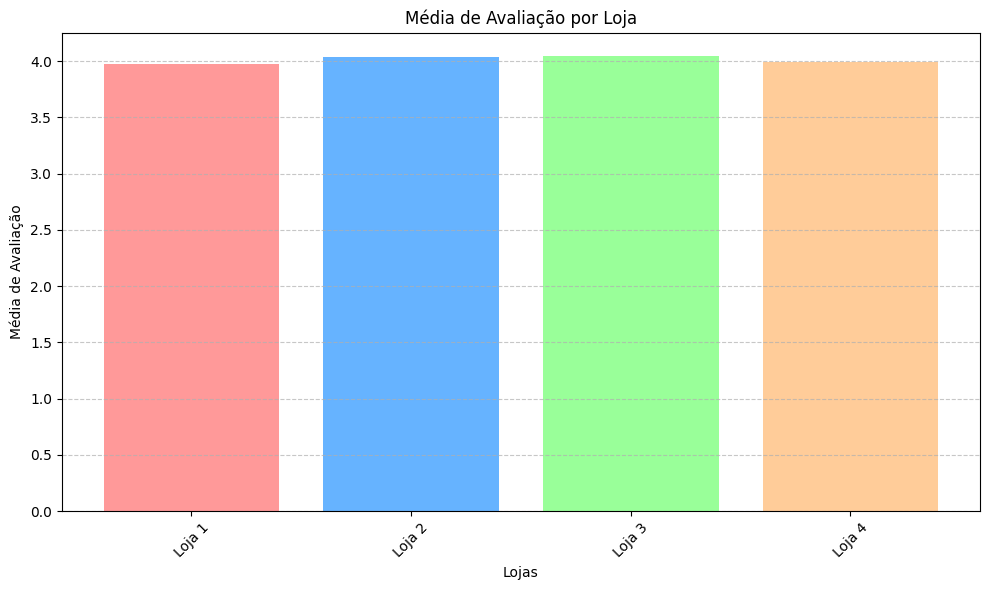

In [147]:

def media(lojas, nomes_lojas, exibir_resultado=True):
    resultados = {}

    for loja, nome_loja in zip(lojas, nomes_lojas):
        # Calcula a média de avaliação
        media_loja = loja['Avaliação da compra'].mean()
        resultados[nome_loja] = media_loja

        # Exibe o resultado, se solicitado
        if exibir_resultado:
            print(f'Média da {nome_loja}: {media_loja:.2f}')

    # Adiciona gráfico para visualizar os resultados
    plt.figure(figsize=(10, 6))
    plt.bar(resultados.keys(), resultados.values(), color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
    plt.title('Média de Avaliação por Loja')
    plt.xlabel('Lojas')
    plt.ylabel('Média de Avaliação')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    return resultados

# Lista de DataFrames
lojas = [loja, loja2, loja3, loja4]
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Calculando as médias e exibindo o gráfico
avaliacoes_medias = media(lojas, nomes_lojas)

# 4. Produtos Mais e Menos Vendidos

In [148]:
import pandas as pd

def produtos_mais_menos_vendidos_por_loja(lojas):
    resultados = []

    for loja, nome_loja in lojas:
        # Agrupando por produto e somando os valores de vendas
        vendas_produto = loja.groupby('Produto')['Preço'].sum()

        # Produto mais vendido
        produto_mais_vendido = {
            'Produto': vendas_produto.idxmax(),
            'Total': vendas_produto.max()
        }

        # Produto menos vendido
        produto_menos_vendido = {
            'Produto': vendas_produto.idxmin(),
            'Total': vendas_produto.min()
        }

        # Adicionando resultados estruturados para cada loja
        resultados.append({
            'Loja': nome_loja,
            'Produto Mais Vendido': produto_mais_vendido['Produto'],
            'Total Mais Vendido (R$)': produto_mais_vendido['Total'],
            'Produto Menos Vendido': produto_menos_vendido['Produto'],
            'Total Menos Vendido (R$)': produto_menos_vendido['Total']
        })

    # Converter os resultados para um DataFrame
    tabela_resultados = pd.DataFrame(resultados)

    # Exibir a tabela
    print("\n📊 Resultados de Produtos Vendidos por Loja:")
    print(tabela_resultados)

    return tabela_resultados


# Lista de lojas e seus nomes
lojas = [(loja, 'Loja 1'), (loja2, 'Loja 2'), (loja3, 'Loja 3'), (loja4, 'Loja 4')]

# Chamando a função e exibindo os resultados em uma tabela
resultados_tabela = produtos_mais_menos_vendidos_por_loja(lojas)


📊 Resultados de Produtos Vendidos por Loja:
     Loja Produto Mais Vendido  Total Mais Vendido (R$) Produto Menos Vendido  \
0  Loja 1        TV Led UHD 4K                189534.28        Corda de pular   
1  Loja 2     Celular Plus X42                150967.83       Cubo mágico 8x8   
2  Loja 3            Geladeira                133185.99       Cubo mágico 8x8   
3  Loja 4     Celular Plus X42                128930.07        Corda de pular   

   Total Menos Vendido (R$)  
0                    870.89  
1                    858.22  
2                    853.81  
3                    939.74  


# 5. Frete Médio por Loja


In [149]:
def media_loja_frete(lojas, exibir_resultado=True):

    dados = {}

    for loja, nome_loja in lojas:
        # Calculando a média do frete
        media_frete = loja['Frete'].mean()
        dados[nome_loja] = media_frete

        # Exibindo o resultado, se solicitado
        if exibir_resultado:
            print(f'Média de Frete para {nome_loja}: R$ {media_frete:.2f}')

    return dados


# Lista de lojas e seus nomes
lojas = [(loja, 'Loja 1'), (loja2, 'Loja 2'), (loja3, 'Loja 3'), (loja4, 'Loja 4')]

# Chamando a função e armazenando os resultados
medias_frete = media_loja_frete(lojas)

# Exemplo de exibição dos resultados armazenados
print("\nResumo das médias de frete por loja:")
for nome_loja, media in medias_frete.items():
    print(f'{nome_loja}: R$ {media:.2f}')

Média de Frete para Loja 1: R$ 34.69
Média de Frete para Loja 2: R$ 33.62
Média de Frete para Loja 3: R$ 33.07
Média de Frete para Loja 4: R$ 31.28

Resumo das médias de frete por loja:
Loja 1: R$ 34.69
Loja 2: R$ 33.62
Loja 3: R$ 33.07
Loja 4: R$ 31.28


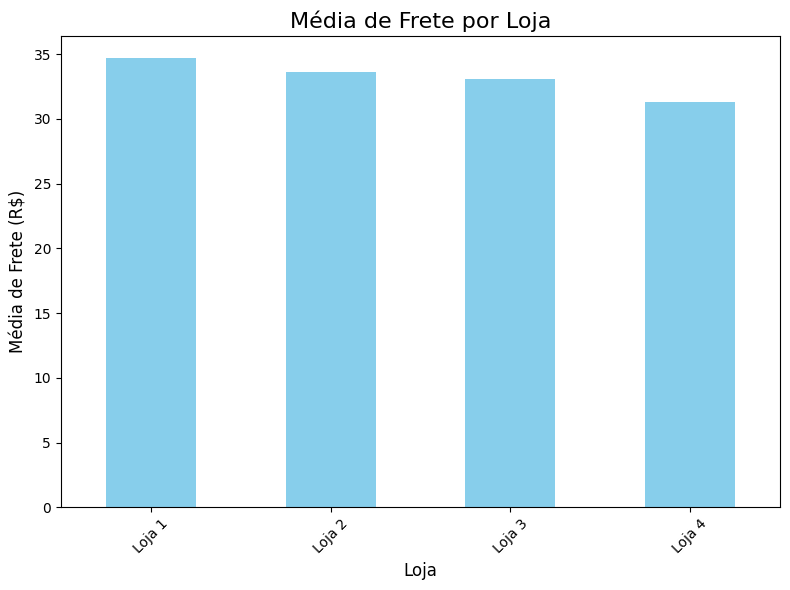

In [150]:
import pandas as pd
import matplotlib.pyplot as plt

def gerar_grafico_com_pandas(medias_frete):

    # Convertendo os dados em um DataFrame
    df_fretes = pd.DataFrame(list(medias_frete.items()), columns=['Loja', 'Média de Frete'])

    # Gerando o gráfico de barras
    df_fretes.plot(x='Loja', y='Média de Frete', kind='bar', legend=False, color='skyblue', figsize=(8, 6))
    plt.title('Média de Frete por Loja', fontsize=16)
    plt.xlabel('Loja', fontsize=12)
    plt.ylabel('Média de Frete (R$)', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()

    # Exibindo o gráfico
    plt.show()


# Chamando a função com os dados das médias calculadas
gerar_grafico_com_pandas(medias_frete)

Resultado final da Analize: Recomendos que o Senhor venda a loja 4 e mantenha o vendor Felipe Santos pois o mesmo e quem vender mais, recomendamos que melhores a qualidade do atendimento na loja1 pos a mesma e que tem o menor avalição do clientes